In [265]:
import pandas as pd 
import numpy as np  
import seaborn as sns   
import matplotlib.pyplot as plt 

In [266]:
sales_df = pd.read_csv("/Users/Marcy_Student/Desktop/Marcy_Projects/Mod1_Final_Project/data/raw/cafe_sales.csv")

In [267]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


In [268]:
sales_df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [269]:
sales_df["Item"] = sales_df["Item"].fillna("UNKNOWN")
sales_df["Item"] = sales_df["Item"].replace('ERROR', "UNKNOWN")

sales_df["Item"].unique()

array(['Coffee', 'Cake', 'Cookie', 'Salad', 'Smoothie', 'UNKNOWN',
       'Sandwich', 'Juice', 'Tea'], dtype=object)

In [270]:
sales_df["Quantity"].unique()

array(['2', '4', '5', '3', '1', 'ERROR', 'UNKNOWN', nan], dtype=object)

In [271]:
#replace the "UNKNOWN" and "ERROR" values inside the sales_df["Quantity"] by nan
sales_df["Quantity"] = sales_df["Quantity"].replace('UNKNOWN', np.nan)
sales_df["Quantity"] = sales_df["Quantity"].replace('ERROR', np.nan)
#sales_df["Quantity"] = sales_df["Quantity"].replace('', np.nan)

#sales_df["Quantity"].astype(float)
sales_df["Quantity"].value_counts()
sales_df["Quantity"].unique()
#sales_df["Quantity"].isna().sum()
#sales_df["Price Per Unit"].groupby(sales_df["Item"]).value_counts()

#me= sales_df["Quantity"].mean()
#sales_df["Quantity"].isnull().str.replace("UNKNOWN","0")
#sales_df["Price Per Unit"].astype(float)



array(['2', '4', '5', '3', '1', nan], dtype=object)

In [272]:
sales_df["Quantity"] = pd.to_numeric(sales_df["Quantity"])

In [273]:
sales_df["Quantity"] = round(sales_df["Quantity"])
median_quantity = sales_df["Quantity"].median()
print(median_quantity)

3.0


In [274]:
sales_df["Quantity"] = sales_df["Quantity"].fillna(median_quantity)
sales_df["Quantity"].isna().sum()

np.int64(0)

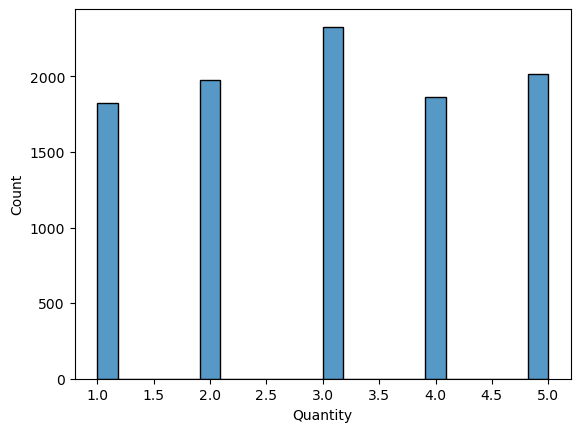

In [275]:
sns.histplot(data=sales_df, x="Quantity")
plt.show()

In [276]:

sales_df["Price Per Unit"].isna().sum()
sales_df["Price Per Unit"].unique()
sales_df["Price Per Unit"] = sales_df["Price Per Unit"].replace("ERROR", np.nan)
sales_df["Price Per Unit"] = sales_df["Price Per Unit"].replace("UNKNOWN", np.nan)
sales_df["Price Per Unit"] = pd.to_numeric(sales_df["Price Per Unit"])
#calculate the median price per unit. 
median_price = sales_df["Price Per Unit"].median()
#Replace the missing values in the price column by the median
sales_df["Price Per Unit"] = sales_df["Price Per Unit"].fillna(median_price)
sales_df["Price Per Unit"].isna().sum()

np.int64(0)

In [278]:
sales_df.groupby("Item")["Price Per Unit"].median()
#sales_df["Item"].mode(dropna=False)

Item
Cake        3.0
Coffee      2.0
Cookie      1.0
Juice       3.0
Salad       5.0
Sandwich    4.0
Smoothie    4.0
Tea         1.5
UNKNOWN     3.0
Name: Price Per Unit, dtype: float64

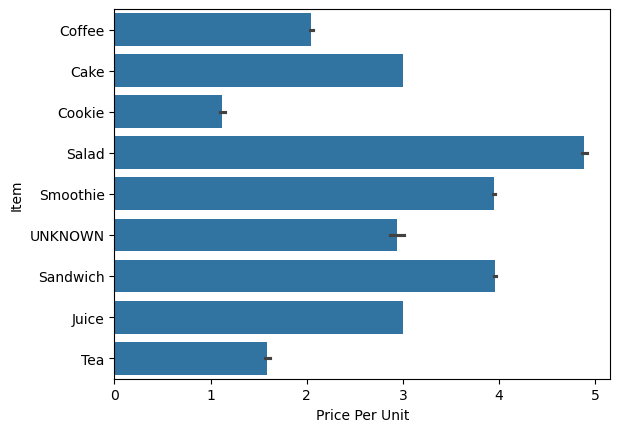

In [279]:
sns.barplot(data=sales_df, x="Price Per Unit", y="Item")
plt.show()


In [280]:

sales_df.isna().sum()

Transaction ID         0
Item                   0
Quantity               0
Price Per Unit         0
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

## Handling Missing Values
1. Drop 5% of the total values of the columns with missing 
2. Replace the missing values by the median for the columns with more than 5% of the total values. 

In [281]:
threshold = len(sales_df) * .05
#col_drop = sales_df.columns[]

In [46]:
sales_df["Item"].isna().sum()

np.int64(0)